In [34]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score

In this homework your task will be to modify `DecisionTreeClassifier` class from your practice in class.

### Task 1 (0.5 point) <br/>

Download Telecom Data To Analyse The Churn Data Set `telecom_churn.csv`. Read it using `pandas.read_csv()` function. To open the function description use `Shift` + `Tab` . Show the first 5 rows of the dataset using `pandas.DataFrame.head()` function.

[Dataset Information](https://www.kaggle.com/spscientist/telecom-data/download):

Columns:
* state
* account length
* area code
* phone number
* international plan
* voice mail plan
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes
* total night calls
* total night charge
* total intl minutes
* total intl calls
* total intl charge
* customer service calls
* churn

In [2]:
data = pd.read_csv('telecom_churn.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


#### Which features are categorical? (0.5 point)

In [4]:
def find_categorical(data):
    for name in data.columns:
        if type(data[name][0]) == str:
            print(f'{name} - строка')
        if data[name].nunique() <= 3:
            print(f'{name} - мало уникальных значений')
find_categorical(data)

state - строка
area code - мало уникальных значений
phone number - строка
international plan - строка
international plan - мало уникальных значений
voice mail plan - строка
voice mail plan - мало уникальных значений
churn - мало уникальных значений


In [5]:
cat_features = ['state', 'area code', 'international plan', 'voice mail plan']
# data['phone number'].value_counts()

### Task 2 (0.5 points) <br/>

The target column for classification is `Churn`. However, it is categorical feature, so you need to encode this by `0` and `1` values (False = 0, True = 1). Implement this encoding.

In [6]:
data.churn = data.churn.map(lambda x: 1 if x else 0)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Task 3 (2 points)

Encode categorical features. Use (0, 1) for binary features. Use target encoding for features with many values.  

In [7]:
for cat_name in cat_features:
    if data[cat_name].nunique() == 2:
        print(f'{cat_name} - 2 уникальных значения')
# data.state.value_counts()

international plan - 2 уникальных значения
voice mail plan - 2 уникальных значения


In [8]:
data['international plan'] = data['international plan'].map(lambda x: 1 if x == 'yes' else 0)
data['voice mail plan'] = data['voice mail plan'].map(lambda x: 1 if x == 'yes' else 0)

In [9]:
def target_encoder(data, cat_features, target_col):
    for cat_name in cat_features:
        cat_data = data[[cat_name, target_col]].groupby([cat_name]).mean().reset_index()
        cat2target_av = dict(zip(cat_data[cat_name], cat_data[target_col]))
        # return cat2target_av
        data[cat_name] = data[cat_name].map(lambda x: cat2target_av[x])
    return data
data = target_encoder(data, ['state', 'area code'], 'churn')

In [10]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,0.185714,128,0.142598,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0.128205,107,0.142598,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0.264706,137,0.142598,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,0.128205,84,0.145585,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,0.147541,75,0.142598,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### Task 4 (2 points) <br/>

Now let's look at this data. For each input feature plot two historgrams in one figure: one historgram for `0` class and the second - for `1` class, as it was done in you practice in class. How do you think, what features are the most informative? For categorical features plot frequency histograms.

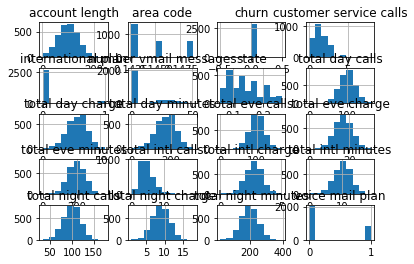

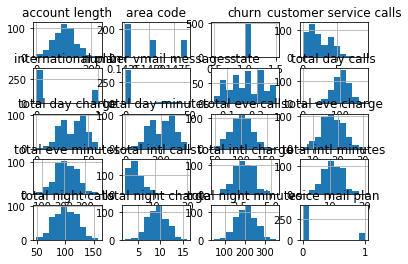

In [11]:
data.loc[data.churn == 0].hist()
plt.show()

data.loc[data.churn == 1].hist()
plt.show()

### Task 5 (0.5 points) <br/>

Create matrix `X` and vector of labels `y`. Split them into train and test samples using `sklearn.model_selection.train_test_split()` function from scikit-learn library. Also, set up random state in the function `random_state=42`.

In [46]:
X.shape

(1000, 2)

In [12]:
X = data.drop(['churn'], axis=1)
y = data.churn

from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

### Task 6 (1 point) <br/>

Fit `DecisionTreeClassifier` from you practice in class with this sample. What is `accuracy` of the classification on the test sample?  

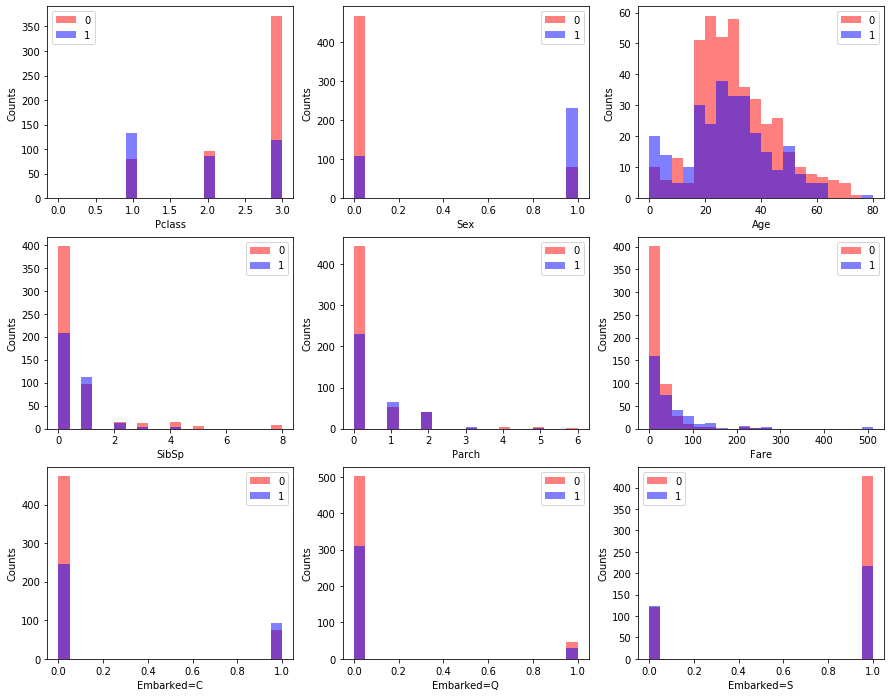

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs
Test accuracy of DT classifier:  0.7325842696629213
Test accuracy of DT classifier:  0.7842696629213484


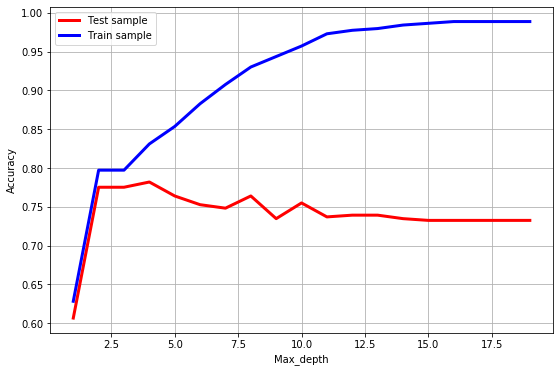

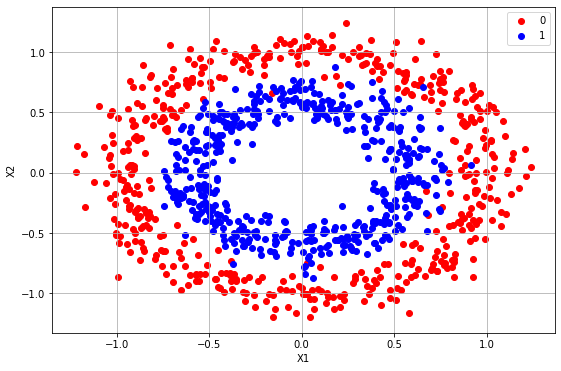

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
Test accuracy of DT classifier:  0.916


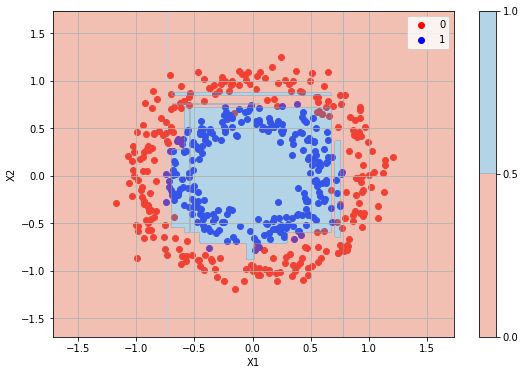

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.25 µs
Test accuracy of DT classifier:  0.972


In [13]:
%run seminar3-trees.ipynb

In [43]:
model_tree = DecisionTreeClassifier(max_depth=3)

In [44]:
model_tree.fit(X_train, y_train)

In [45]:
print(f'accur: {accuracy_score(model_tree.predict(X_test), y_test)}')
print(f'roc_auc: {roc_auc_score(model_tree.predict(X_test), y_test)}')

accur: 0.72
roc_auc: 0.7768510504366984


### Task 7 (3 points) <br/>

Implement feature importance estimation in `DecisionTreeClassifier`. Importance of a feature $f$ is defined as follows:

* Let $T(f)$ be the set of all nodes, relying on feature $f$ when making split.
* Efficiency of split at node $t$: $\Delta I(t)=I(t)-\sum_{c\in childen(t)}\frac{n_{c}}{n_{t}}I(c)$
* Feature importance of $f$: $\sum_{t\in T(f)}n_{t}\Delta I(t)$

Calculate importance of input features in your dataset. What features are the most important (informative) for the classification?

In [9]:
# Your code here

### Task 8 (3 points) <br/>

Implement Reduced Error Pruning in you `DecisionTreeClassifier`. Fit the classifier similar to **Task 6** setting up `max_depth=20`. Prune this decision tree. Do you have test accuracy improvement?

In [10]:
# Your code here